In [1]:
# Importing required libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load Titanic dataset
df = sns.load_dataset('titanic')

In [3]:
# Display basic info
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
print("\nMissing Values:")
display(df.isnull().sum())


Missing Values:


,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [7]:
# Shape of the dataset
print("Shape:", df.shape)

Shape: (891, 15)


In [18]:

# Drop rows with missing 'embarked' or 'embark_town'
df.dropna(subset=['embarked', 'embark_town'], inplace=True)


In [19]:
# Create new feature: family_size
df['family_size'] = df['sibsp'] + df['parch'] + 1
display(df[['sibsp', 'parch', 'family_size']].head())


,sibsp,parch,family_size
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


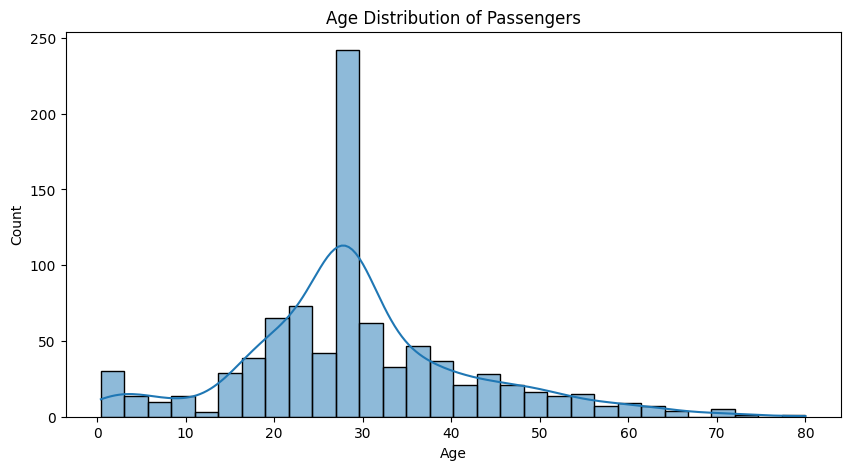

In [20]:
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


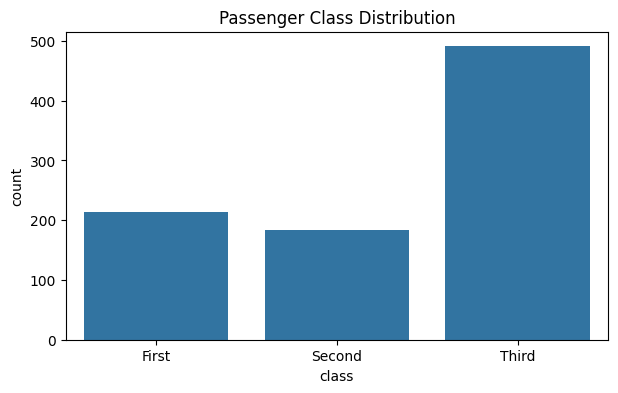

In [22]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='class', order=['First', 'Second', 'Third'])
plt.title("Passenger Class Distribution")
plt.show()


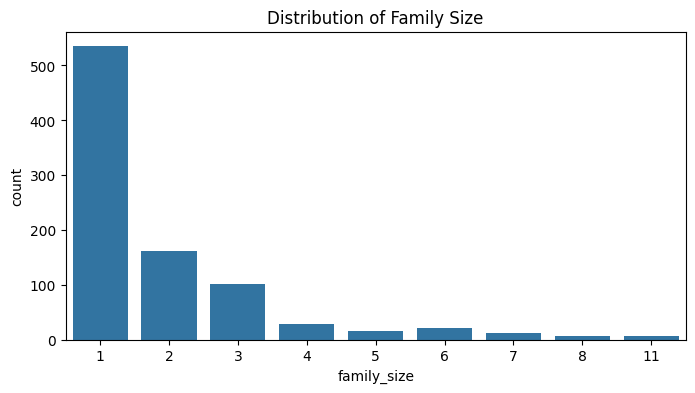

In [23]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='family_size')
plt.title("Distribution of Family Size")
plt.show()


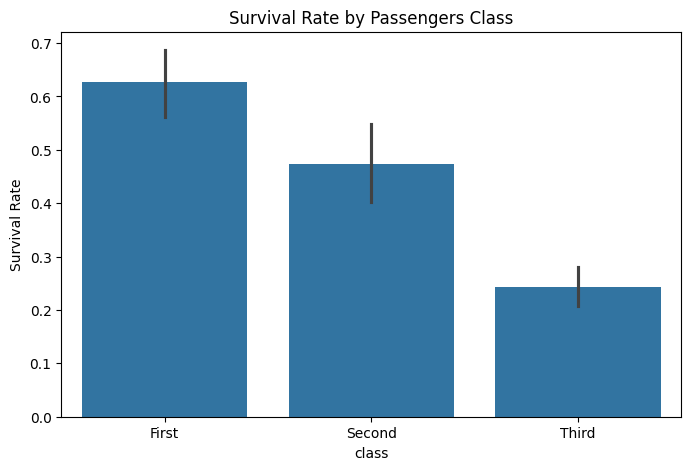

In [21]:
# Visualize survival rate by class
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='class', y='survived')
plt.title('Survival Rate by Passengers Class')
plt.ylabel('Survival Rate')
plt.show()

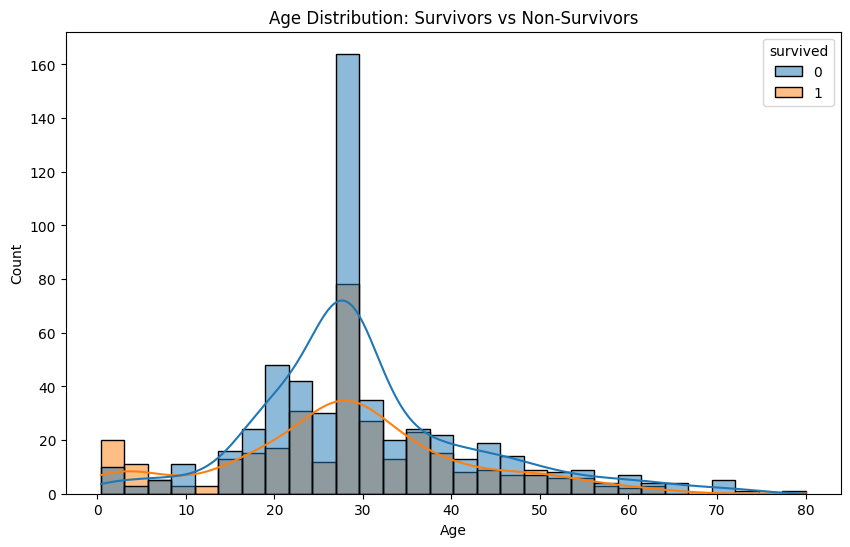

In [12]:
# Visualize age distribution for survivors and non-survivors
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='survived', kde=True, bins=30)
plt.title('Age Distribution: Survivors vs Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

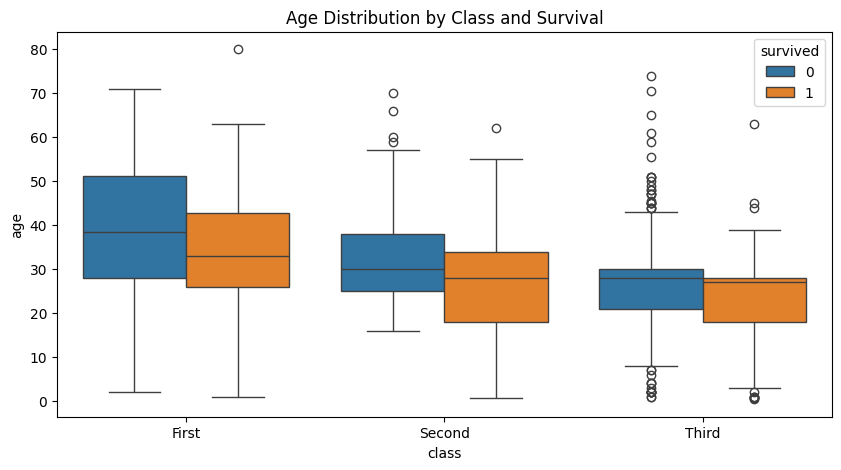

In [13]:
# Box plot to analyze age vs class
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='class', y='age', hue='survived')
plt.title('Age Distribution by Class and Survival')
plt.show()

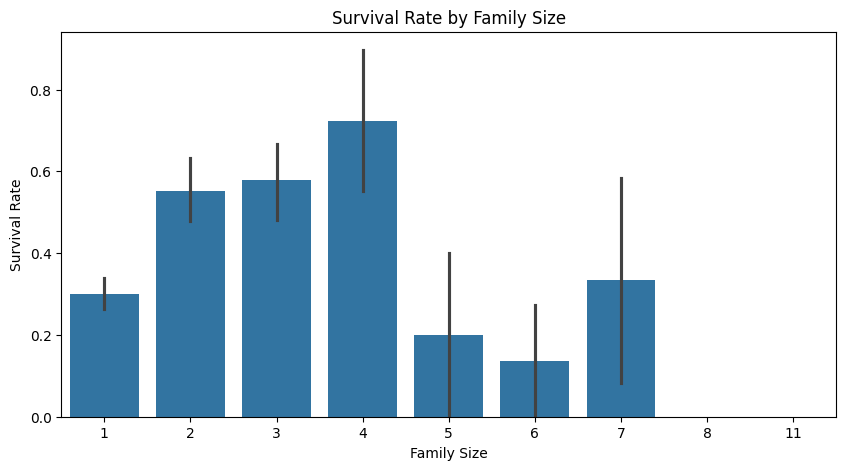

In [14]:
# Visualize survival rate by family size
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='family_size', y='survived')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

<Figure size 1000x600 with 0 Axes>

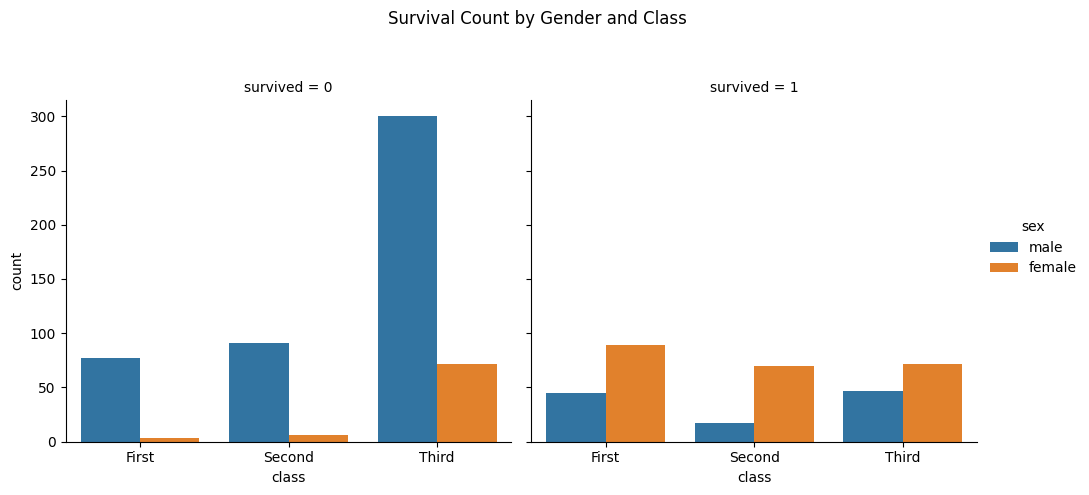

In [16]:
# Gender and Class survival rate
plt.figure(figsize=(10, 6))
sns.catplot(data=df, x='class', hue='sex', col='survived', kind='count', height=5, aspect=1)
plt.subplots_adjust(top=0.8)
plt.suptitle('Survival Count by Gender and Class')
plt.show()

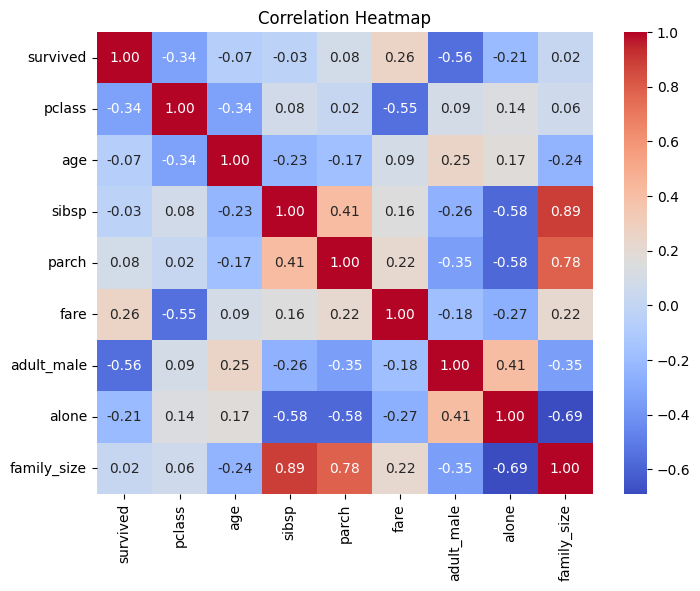

In [15]:
# Correlation heatmap for numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()